# Imports

In [39]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.applications.vgg19 import VGG19,decode_predictions as vgg19decode ,preprocess_input as preprocessvgg19

from IPython.core.display import display

# Constants

In [3]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'


# Preprocessing Images

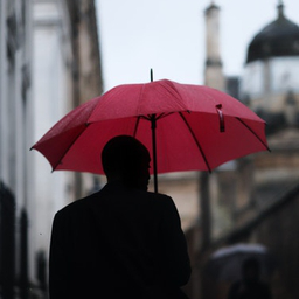

In [21]:
pic = load_img(FILE_1,target_size=(299,299))
display(pic)

In [22]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [23]:
expanded = np.expand_dims(pic_array,0)
expanded.shape

(1, 299, 299, 3)

In [28]:
preprocessed = preprocess_input(expanded)

**Challenge:** Create a function called ```format_img_inceptionresnet()``` that takes a filename as an argument. Return the image in preprocessed format of InceptionResNetv2 model

In [35]:
def format_img_inception(file_path):
  pic = load_img(file_path,target_size=(299,299))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array,0)
  preprocessed = preprocess_input(expanded)
  return preprocessed

# Load InceptionResnet

In [9]:
%%time
inception_model = InceptionResNetV2(weights='imagenet' )

225214464/225209952 [==============================] - 2s 0us/step
CPU times: user 6.52 s, sys: 1 s, total: 7.52 s
Wall time: 8.67 s


In [17]:
inception_model.graph = tf.compat.v1.get_default_graph()

# Making Predictions

In [29]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.82924366),
  ('n03792972', 'mountain_tent', 0.0012268272),
  ('n04479046', 'trench_coat', 0.0011062968),
  ('n03788195', 'mosque', 0.0010572381),
  ('n03220513', 'dome', 0.0010311018)]]

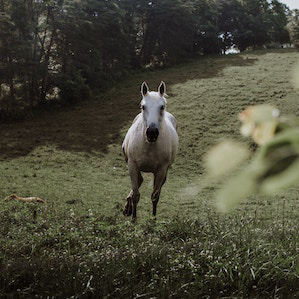

[[('n02389026', 'sorrel', 0.44831762),
  ('n02412080', 'ram', 0.029898886),
  ('n02106030', 'collie', 0.019694556),
  ('n04604644', 'worm_fence', 0.016888143),
  ('n04049303', 'rain_barrel', 0.013531355)]]

In [47]:
data = format_img_inception('04 Horse.jpg')
prediction = inception_model.predict(data)
display(load_img('04 Horse.jpg'))
decode_predictions(prediction)

# Testing the VGG19 Model


In [36]:
def format_img_vgg19(file_path):
  pic = load_img(file_path,target_size=(224,224))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array,0)
  preprocessed = preprocessvgg19(expanded)
  return preprocessed

In [37]:
%%time
vgg19_model = VGG19()


574717952/574710816 [==============================] - 7s 0us/step
CPU times: user 3.76 s, sys: 2.64 s, total: 6.4 s
Wall time: 9.33 s


In [38]:
vgg19_model.graph = tf.compat.v1.get_default_graph()

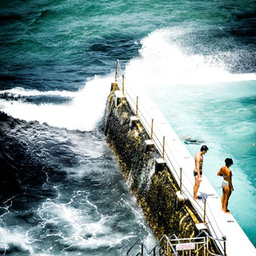

[[('n04347754', 'submarine', 0.16831194),
  ('n02894605', 'breakwater', 0.12554646),
  ('n03662601', 'lifeboat', 0.09670164),
  ('n09399592', 'promontory', 0.0842404),
  ('n02981792', 'catamaran', 0.08419318)]]

In [43]:
data = format_img_vgg19(FILE_3)
prediction = vgg19_model.predict(data)
display(load_img(FILE_3))
vgg19decode(prediction)

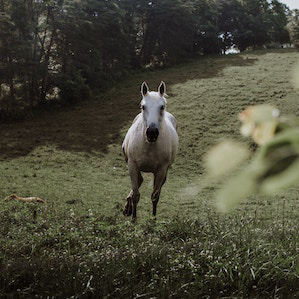

[[('n02412080', 'ram', 0.73425114),
  ('n02415577', 'bighorn', 0.11609455),
  ('n02403003', 'ox', 0.017533239),
  ('n02437616', 'llama', 0.011443073),
  ('n02091134', 'whippet', 0.00935115)]]

In [46]:
data = format_img_vgg19('04 Horse.jpg')
prediction = vgg19_model.predict(data)
display(load_img('04 Horse.jpg'))
vgg19decode(prediction)